In [1]:
# Import Packages
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
# Import functions
from my_functions import *

In [2]:
df_new = pd.read_csv('data/complete_data.csv')
# total number of cars 
N = len(df_new)
# value of cars varies
profit = df_new['Profit']
# size of the cars varies
size = df_new["size"]
# total size of all cars
total_size = np.sum(size)
# parking lot capacity
parkCapacity = 2*total_size/3

# Buying price for each car
buy_price = df_new["Buying Price"]
# total amount of buying cost
total_price = np.sum(buy_price)
# total budget the dealership has
dealBudget = total_price/4

# approximation with greedy algorithm
fuel = df_new["fuel_type"].values
imported = df_new["imported"].values
profit = df_new['Profit'].values
cost = df_new['Buying Price'].values

global value_per_size 
value_per_size = profit/size
global value_per_budget 
value_per_budget = profit/buy_price
global should_break
should_break=False

global items
items = []
global counter_import
counter_import = 0
global counter_EV
counter_EV = 0

EV_fee = 300
license_fee = 1000

##### This code chunk takes about 33 seconds to finish with given range, please be patient!

In [3]:
budgetRange = np.arange(dealBudget, total_price, 10000000)
budget_results_budget =[]
budget_results_size = []

for budget in budgetRange:
    # ddog-budget
    result_budget = ddog_budget(items,fuel, imported, 
              value_per_budget,
              profit, EV_fee, license_fee, 
              size, cost, parkCapacity,budget,
              counter_EV, counter_import,should_break)
    # reset everything for ddog_size to work
    items = []
    counter_import = 0
    counter_EV = 0
    should_break=False
    value_per_size = profit/size
    # ddog-size
    result_size = ddog_size(items,fuel, imported, 
              value_per_size, 
              profit, EV_fee, license_fee, 
              size, cost, parkCapacity,budget,
              counter_EV, counter_import, should_break)
    budget_results_budget.append(len(result_budget))
    budget_results_size.append(len(result_size))
    items = []
    counter_import = 0
    counter_EV = 0
    should_break=False
    value_per_budget = profit/buy_price

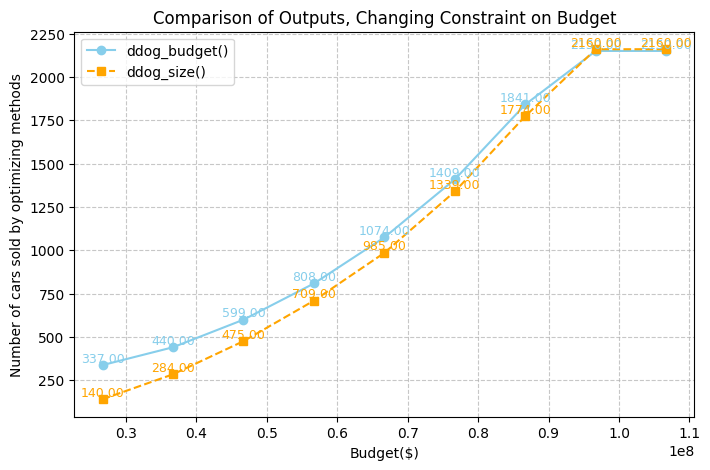

In [4]:
# Create the figure
plt.figure(figsize=(8, 5))

# Plot the output of ddog_budget()
plt.plot(budgetRange, budget_results_budget, marker='o', linestyle='-', 
         color='skyblue', label='ddog_budget()')

# Plot the output of ddog_size()
plt.plot(budgetRange, budget_results_size, marker='s', linestyle='--', 
         color='orange', label='ddog_size()')

# Add labels and title
plt.xlabel('Budget($)')
plt.ylabel('Number of cars sold by optimizing methods')
plt.title('Comparison of Outputs, Changing Constraint on Budget')
plt.grid(True, linestyle='--', alpha=0.7)
for i, value in enumerate(budget_results_budget):
    plt.text(budgetRange[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=9, color='skyblue')

for i, value in enumerate(budget_results_size):
    plt.text(budgetRange[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=9, color='orange')

plt.legend()
plt.savefig("data/compare_budget.png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()


In [7]:
sizeRange = np.arange(parkCapacity, total_size, 1000)
size_results_budget =[]
size_results_size = []

for capacity in sizeRange:
    # ddog-budget
    result_budget = ddog_budget(items,fuel, imported, 
              value_per_budget,
              profit, EV_fee, license_fee, 
              size, cost, capacity,dealBudget,
              counter_EV, counter_import,should_break)
    # reset everything for ddog_size to work
    items = []
    counter_import = 0
    counter_EV = 0
    should_break=False
    value_per_size = profit/size
    # ddog-size
    result_size = ddog_size(items,fuel, imported, 
              value_per_size, 
              profit, EV_fee, license_fee, 
              size, cost, capacity,dealBudget,
              counter_EV, counter_import, should_break)
    size_results_budget.append(len(result_budget))
    size_results_size.append(len(result_size))
    items = []
    counter_import = 0
    counter_EV = 0
    should_break=False
    value_per_budget = profit/buy_price

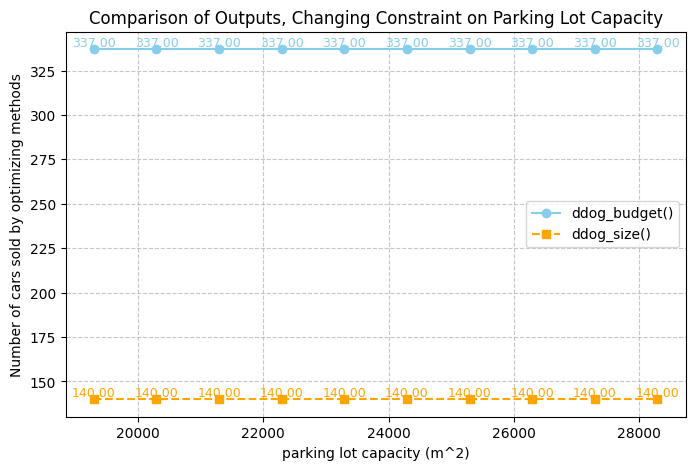

In [8]:

# Create the figure
plt.figure(figsize=(8, 5))

# Plot the output of ddog_budget()
plt.plot(sizeRange, size_results_budget, marker='o', linestyle='-', 
         color='skyblue', label='ddog_budget()')

# Plot the output of ddog_size()
plt.plot(sizeRange, size_results_size, marker='s', linestyle='--', 
         color='orange', label='ddog_size()')

# Add labels and title
plt.xlabel('parking lot capacity (m^2)')
plt.ylabel('Number of cars sold by optimizing methods')
plt.title('Comparison of Outputs, Changing Constraint on Parking Lot Capacity')
plt.grid(True, linestyle='--', alpha=0.7)
for i, value in enumerate(size_results_budget):
    plt.text(sizeRange[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=9, color='skyblue')

for i, value in enumerate(size_results_size):
    plt.text(sizeRange[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=9, color='orange')

plt.legend()
plt.savefig("data/compare_capacity.png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()

In [15]:
testCapacity = (total_size/6)
sizeRange = np.arange(testCapacity, total_size, 2500)
size_results_budget =[]
size_results_size = []

for capacity in sizeRange:
    # ddog-budget
    result_budget = ddog_budget(items,fuel, imported, 
              value_per_budget,
              profit, EV_fee, license_fee, 
              size, cost, capacity,dealBudget,
              counter_EV, counter_import,should_break)
    # reset everything for ddog_size to work
    items = []
    counter_import = 0
    counter_EV = 0
    should_break=False
    value_per_size = profit/size
    # ddog-size
    result_size = ddog_size(items,fuel, imported, 
              value_per_size, 
              profit, EV_fee, license_fee, 
              size, cost, capacity,dealBudget,
              counter_EV, counter_import, should_break)
    size_results_budget.append(len(result_budget))
    size_results_size.append(len(result_size))
    items = []
    counter_import = 0
    counter_EV = 0
    should_break=False
    value_per_budget = profit/buy_price

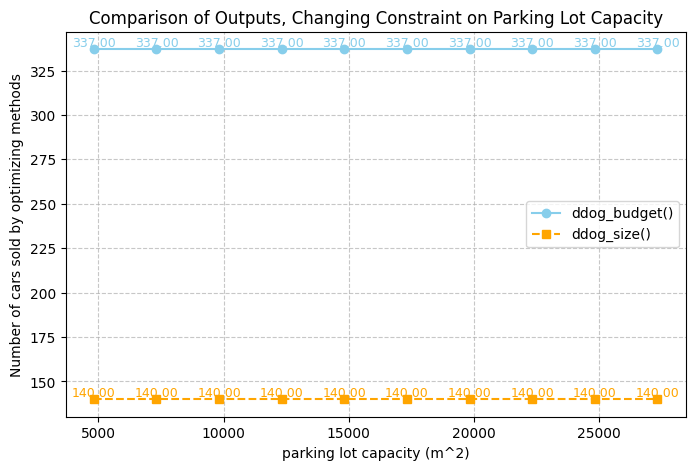

In [16]:
# Create the figure
plt.figure(figsize=(8, 5))

# Plot the output of ddog_budget()
plt.plot(sizeRange, size_results_budget, marker='o', linestyle='-', 
         color='skyblue', label='ddog_budget()')

# Plot the output of ddog_size()
plt.plot(sizeRange, size_results_size, marker='s', linestyle='--', 
         color='orange', label='ddog_size()')

# Add labels and title
plt.xlabel('parking lot capacity (m^2)')
plt.ylabel('Number of cars sold by optimizing methods')
plt.title('Comparison of Outputs, Changing Constraint on Parking Lot Capacity')
plt.grid(True, linestyle='--', alpha=0.7)
for i, value in enumerate(size_results_budget):
    plt.text(sizeRange[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=9, color='skyblue')

for i, value in enumerate(size_results_size):
    plt.text(sizeRange[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=9, color='orange')

plt.legend()
plt.savefig("data/compare_capacity_2.png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()